<B>Objective:</B>

 - Implement the backpropagation algorithm to train a simple neural network.
 - Understand the core concepts of backpropagation, including forward and backward passes.
 - Experiment with different hyperparameters to optimize the network's performance.

Our goal in training a neural network is to find weights and biases which minimize the quadratic **loss function** $L(w,b)$.

We have used in the Regression models, the **gradient descent** to solve such minimization problems. The goal of backpropagation is to compute the partial derivatives $∂L/∂w$ and $∂L /∂b$ of the loss function.

The **backpropagation** algorithm is able to compute the gradient of the neural network’s error with regards to every single model parameter. In other words, it can find out how each connection weight and each bias term should be tweaked (updated) in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

At the heart of backpropagation is an expression for the partial derivative ∂L/∂w of the loss (also called cost function) $L$ with respect to any weight $w$ (or bias $b$) in the network. The expression tells us how quickly the cost changes when we change the weights and biases.


**Gradient Decsent Method:**

 1. choose weights $W$, and biases $b$ randomly (Initialization)

 2. Repeat Until Convergence

 For each training instance :
 - make a prediction (forward pass)
 - compute the loss $L$,
 - **go through each layer in reverse to measure the error cotribution from each connection (Backpropagation)**:
      $∂L/∂w$, and $∂L/∂b$
 - update the connection weights to reduce the error (Gradient Descent step).
      $W' = W- α ∂L/∂w$, $b' = b- α ∂L/∂b$
      


### Setup the Environment
Description: Import required libraries and set up configurations.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Set random seed for reproducibility
np.random.seed(42)

### Load and Explore the Data
Description: Load the Iris dataset, explore its structure, and prepare it for training.

In [2]:
# Load the dataset
data = load_iris()

# Explore dataset structure
print(data.DESCR)

# Features and target variables
X = data.data
y = data.target

# Print first 5 rows of data
print("First 5 rows of X:\n", X[:5])
print("First 5 rows of y:\n", y[:5])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Preprocess the Data
Description: Split the data into training, validation, and test sets, and encode the target variable using one-hot encoding.

In [3]:
# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# One-hot encode the target variable
output_size = 3  # Number of classes
y_train_one_hot = np.eye(output_size)[y_train]
y_val_one_hot = np.eye(output_size)[y_val]
y_test_one_hot = np.eye(output_size)[y_test]

### Define Hyperparameters
Description: Specify the learning rate, number of iterations, and architecture of the neural network.

In [4]:
# Define hyperparameters
learning_rate = 0.1
num_iterations = 10000
input_size = X_train.shape[1]
hidden_size1 = 4
hidden_size2 = 3
output_size = 3

### Initialize Weights
Description: Initialize weights randomly with small values.

In [5]:
# Initialize weights
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size1))
W2 = np.random.normal(scale=0.5, size=(hidden_size1, hidden_size2))
W3 = np.random.normal(scale=0.5, size=(hidden_size2, output_size))

# Print weight shapes for verification
print("W1 shape:", W1.shape, "\nW2 shape:", W2.shape, "\nW3 shape:", W3.shape)

W1 shape: (4, 4) 
W2 shape: (4, 3) 
W3 shape: (3, 3)


### Define Activation and Loss Functions
Description: Create functions for the sigmoid activation, mean squared error, and accuracy calculation.

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true) ** 2).sum() / (2 * y_pred.size)

def accuracy(y_pred, y_true):
    pred = np.argmax(y_pred, axis=1)
    true = np.argmax(y_true, axis=1)
    return np.mean(pred == true)


### Implement Forward Propagation
Description: Pass inputs through the layers and compute activations.

In [7]:
def forward_pass(X, W1, W2, W3):
    Z1 = np.dot(X, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W3)
    A3 = sigmoid(Z3)
    return A1, A2, A3

### Train the Model with Backpropagation
Description: Compute gradients for each layer and update weights iteratively.

In [8]:
# Initialize a DataFrame to store results
results = pd.DataFrame(columns=["iteration", "mse", "accuracy"])

# Training loop
for i in range(num_iterations):
    # Forward pass
    A1, A2, A3 = forward_pass(X_train, W1, W2, W3)

    # Compute errors and gradients
    error = A3 - y_train_one_hot
    dZ3 = error * (A3 * (1 - A3))
    dW3 = np.dot(A2.T, dZ3) / len(X_train)

    dZ2 = np.dot(dZ3, W3.T) * (A2 * (1 - A2))
    dW2 = np.dot(A1.T, dZ2) / len(X_train)

    dZ1 = np.dot(dZ2, W2.T) * (A1 * (1 - A1))
    dW1 = np.dot(X_train.T, dZ1) / len(X_train)

    # Update weights
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    W3 -= learning_rate * dW3

    # Log results every 1000 iterations
    if i % 1000 == 0:
        mse = mean_squared_error(A3, y_train_one_hot)
        acc = accuracy(A3, y_train_one_hot)
        temp_df = pd.DataFrame([{"iteration": i, "mse": mse, "accuracy": acc}])
        results = pd.concat([results, temp_df], ignore_index=True)

# Print final training results
print("Final Training Accuracy:", acc)

Final Training Accuracy: 0.9714285714285714


### Visualize Training Progress
Description: Plot the mean squared error and accuracy over iterations.

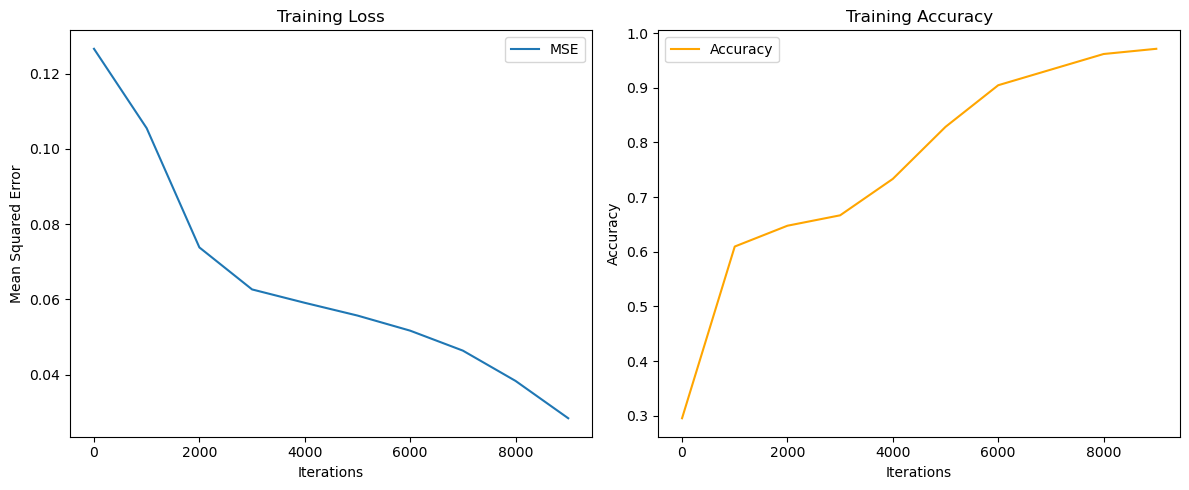

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(results["iteration"], results["mse"], label="MSE")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Training Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results["iteration"], results["accuracy"], label="Accuracy", color="orange")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

### Evaluate on Test Data
Description: Test the trained model on the test set.

In [10]:
# Test the model
_, _, A3_test = forward_pass(X_test, W1, W2, W3)
test_acc = accuracy(A3_test, y_test_one_hot)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.9130434782608695


### Improve your neural network (nn)  implemented in the first part (LAb5-a) by considering the following points:

Clean and put the code together
Modify the code: Create a backpopagation function to allow any number of layers, and any number of units in each layer

Test Accuracy: 0.8666666666666667


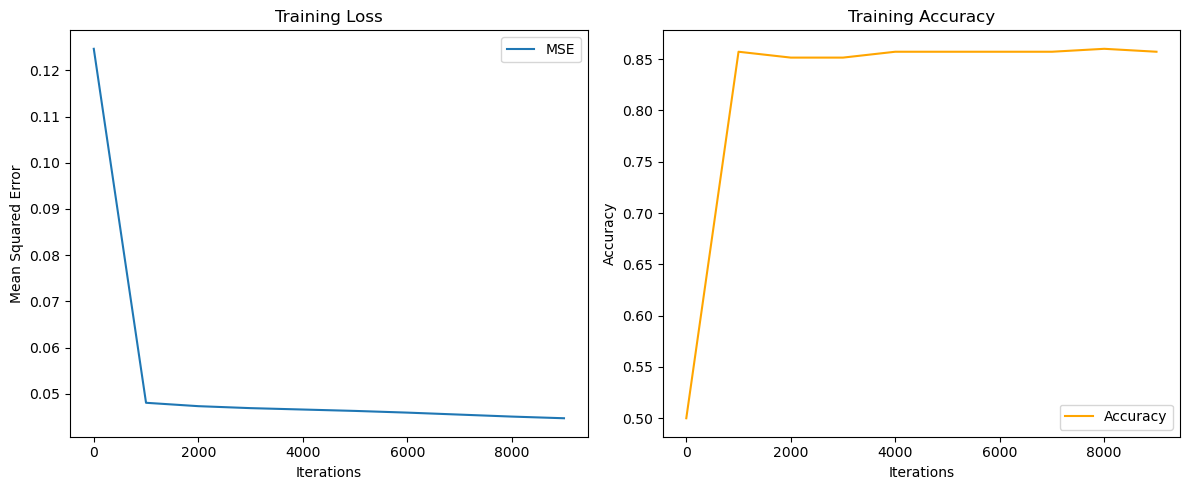

In [11]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define helper functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true) ** 2).sum() / (2 * y_pred.size)

def accuracy(y_pred, y_true):
    pred = np.argmax(y_pred, axis=1)
    true = np.argmax(y_true, axis=1)
    return np.mean(pred == true)

# Initialize weights and biases
def initialize_parameters(layers):
    parameters = {}
    for l in range(1, len(layers)):
        parameters[f'W{l}'] = np.random.normal(scale=0.5, size=(layers[l-1], layers[l]))
        parameters[f'b{l}'] = np.zeros((1, layers[l]))
    return parameters

# Forward propagation
def forward_propagation(X, parameters, layers):
    cache = {"A0": X}  # Store inputs as A0
    for l in range(1, len(layers)):
        W = parameters[f'W{l}']
        b = parameters[f'b{l}']
        A_prev = cache[f"A{l-1}"]
        Z = np.dot(A_prev, W) + b
        A = sigmoid(Z)
        cache[f"Z{l}"] = Z
        cache[f"A{l}"] = A
    return cache

# Backpropagation
def back_propagation(y_true, parameters, layers, cache, learning_rate):
    gradients = {}
    L = len(layers) - 1  # Number of layers
    m = y_true.shape[0]  # Number of samples

    # Compute output layer error
    A_final = cache[f"A{L}"]
    dZ = A_final - y_true
    for l in reversed(range(1, L + 1)):
        A_prev = cache[f"A{l-1}"]
        W = parameters[f'W{l}']

        # Gradients
        gradients[f"dW{l}"] = np.dot(A_prev.T, dZ) / m
        gradients[f"db{l}"] = np.sum(dZ, axis=0, keepdims=True) / m

        # Backpropagate the error to the previous layer
        if l > 1:
            dA_prev = np.dot(dZ, W.T)
            dZ = dA_prev * sigmoid_derivative(A_prev)

    # Update weights and biases
    for l in range(1, L + 1):
        parameters[f'W{l}'] -= learning_rate * gradients[f"dW{l}"]
        parameters[f'b{l}'] -= learning_rate * gradients[f"db{l}"]

    return parameters

# Train the network
def train(X, y, layers, learning_rate=0.1, num_iterations=10000):
    # Initialize weights and biases
    parameters = initialize_parameters(layers)

    # Store training progress
    results = pd.DataFrame(columns=["iteration", "mse", "accuracy"])

    for i in range(num_iterations):
        # Forward propagation
        cache = forward_propagation(X, parameters, layers)

        # Backpropagation
        parameters = back_propagation(y, parameters, layers, cache, learning_rate)

        # Logging performance
        if i % 1000 == 0:
            mse = mean_squared_error(cache[f"A{len(layers)-1}"], y)
            acc = accuracy(cache[f"A{len(layers)-1}"], y)
            temp_df = pd.DataFrame([{"iteration": i, "mse": mse, "accuracy": acc}])
        results = pd.concat([results, temp_df], ignore_index=True)

    return parameters, results

# Make predictions
def predict(X, parameters, layers):
    cache = forward_propagation(X, parameters, layers)
    output = cache[f"A{len(layers)-1}"]
    return np.argmax(output, axis=1)

# Evaluate accuracy
def evaluate(X, y, parameters, layers):
    y_pred = predict(X, parameters, layers)
    y_true = np.argmax(y, axis=1)
    return np.mean(y_pred == y_true)

# Example usage
# Load or generate your dataset (replace with your dataset)
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Generate dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# Split dataset
X_train, X_test, y_train_one_hot, y_test_one_hot = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)

# Define architecture: input layer (2), two hidden layers (5, 3), output layer (2)
layers = [X_train.shape[1], 5, 3, y_train_one_hot.shape[1]]

# Train the model
parameters, results = train(X_train, y_train_one_hot, layers, learning_rate=0.1, num_iterations=10000)

# Evaluate the model on test data
test_accuracy = evaluate(X_test, y_test_one_hot, parameters, layers)
print("Test Accuracy:", test_accuracy)

# Visualize training progress
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(results["iteration"], results["mse"], label="MSE")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Training Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results["iteration"], results["accuracy"], label="Accuracy", color="orange")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
